## Introduction to Markov Process

**Random Process**
- A rando process in which we can deterministically find the state of each random variable given the initial conditions  are known as deterministic random processes (height of a bouncing ball).
- A random processes, in which we can't determine the state of a process, even if we are given the initial conditions and all the parameters of the system, are known as stochastic random processes (stock market)

#### Q: Generate a deterministic random process example using gaussian noise over a sine wave.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

mu = 0,
sigma = 0.1
x = np.arange(-np.pi, np.pi, 0.1)
s = np.random.normal(mu, sigma, len(x))
y = np.sin(x) + s
yy =np.sin(x)

In [42]:
len(s),len(s)

(63, 63)

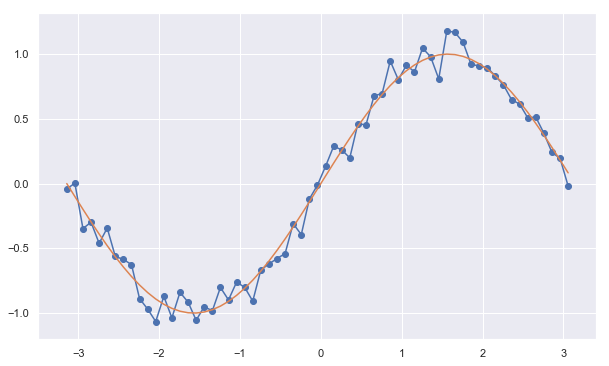

In [43]:
plt.figure(figsize = [10,6])
plt.plot(x,y,'-')
plt.plot(x,yy,"-")
plt.scatter(x,y)
plt.show()

#### Q: Generate a stocastic random process example using random walk in 1d.

In [45]:
import random as random

'''X stores 1-D coordinate'''
X = []
'''T stores time coordinate'''
T = []
'''starting point'''
x = 0
'''length of each step'''
d = 1

'''iteratefor N steps'''
for t in range(100):
    
    '''Walk one step ahead'''
    x = x + d*random.choice([-1,1])
    
    '''collect time'''
    T.append(t)
    '''collect position'''
    X.append(x)


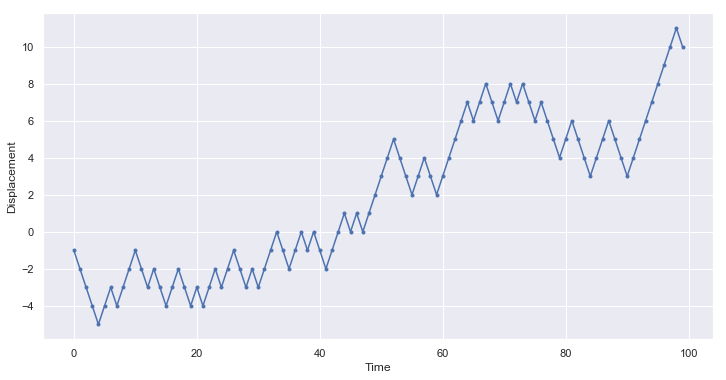

In [46]:
'''Make a plot'''    
plt.figure(figsize = [12,6])
plt.scatter(T,X,marker = '.')
plt.plot(T,X)
plt.xlabel("Time")
plt.ylabel('Displacement')
plt.grid(True)
plt.show()

### Markov Process

A stochastic process is called a Markov process if the state of the random variable at the next instance of time depends only on the outcome of the random variable at the current time. In simplistic mathematical terms, for a stochastic process,

$S = {R_1, R_2, . . ., R_n} = {R}_{t=1, . . ., n}$, 

to be a Markov process, it must satisfy the following condition:

$P(R_{n+1} | R_1, R_2,..., R_n) = P(R_{n+1} | R_n)$

According to the previous condition, the probability distribution for any variable at any given instance in a Markov process is a conditional distribution, which is conditioned only on the random variable at the last time instance. This property of a system, such that **the future states of the system depend only on the current state of the system**, is also known as the **Markov property**. Systems satisfying the Markov property are also known as **memoryless systems** since they don't need to remember the previous states to compute the distribution of the next state, or, in other words, the next state depends only on the current state of the system.

### Discrite Time Markov Process

![img](img/example1.png)

In [49]:
import numpy as np

class MarkovChain(object):
    def __init__(self, transition_prob):
        """
        Initialize the MarkovChain instance.

        Parameters
        ----------
        transition_prob: dict
            A dict object representing the transition probabilities in 
            Markov Chain. Should be of the form: {'state1': {'state1': 
            0.1, 'state2': 0.4}, 'state2': {...}}
        """
        self.transition_prob = transition_prob
        self.states = list(transition_prob.keys())

    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.

        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
            self.states, p=[self.transition_prob[current_state][next_state] 
                            for next_state in self.states])

    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.

        Parameters
        ----------
        current_state: str
            The state of the current random variable.

        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [66]:
weather_chain = MarkovChain(transition_prob=transition_prob)

transition_prob = {'Sunny': {'Sunny': 0.8, 'Rainy': 0.19, 
 'Snowy': 0.01},
 'Rainy': {'Sunny': 0.2, 'Rainy': 0.7,
 'Snowy': 0.1},
 'Snowy': {'Sunny': 0.1, 'Rainy': 0.2,
 'Snowy': 0.7}}

DAYS = weather_chain.generate_states(current_state='Snowy', no=100)     

**Q: How does tempersture fluctuate ?**

In [67]:
Temp = {"Snowy":0,"Rainy":10, "Sunny":20}

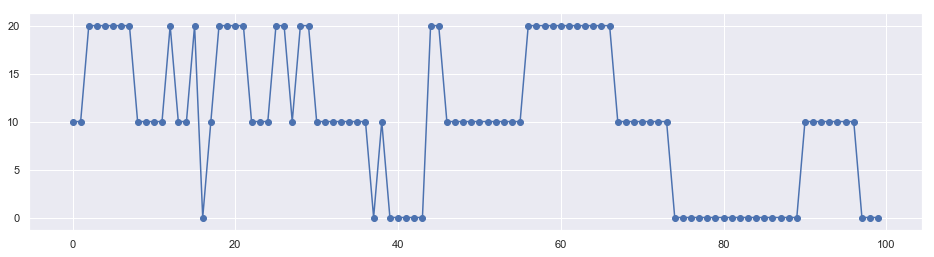

In [72]:
X,Y = [],[]
plt.figure(figsize = [16,4])
for i,day in enumerate(DAYS):
    X.append(i)
    Y.append(Temp[day])
plt.plot(X,Y,"-")
plt.scatter(X,Y)
plt.show()

### Transition Matirx Method

![img](img/matrix1.png)

In [76]:
import numpy as np

class MarkovChain(object):
    def __init__(self, transition_matrix, states):
        """
        Initialize the MarkovChain instance.

        Parameters
        ----------
        transition_matrix: 2-D array
            A 2-D array representing the probabilities of change of 
            state in the Markov Chain.

        states: 1-D array 
            An array representing the states of the Markov Chain. It
            needs to be in the same order as transition_matrix.
        """
        self.transition_matrix = np.atleast_2d(transition_matrix)
        self.states = states
        self.index_dict = {self.states[index]: index for index in 
                           range(len(self.states))}
        self.state_dict = {index: self.states[index] for index in
                           range(len(self.states))}

    def next_state(self, current_state):
        """
        Returns the state of the random variable at the next time 
        instance.

        Parameters
        ----------
        current_state: str
            The current state of the system.
        """
        return np.random.choice(
                    self.states, 
                    p=self.transition_matrix[self.index_dict[current_state], :])

    def generate_states(self, current_state, no=10):
        """
        Generates the next states of the system.

        Parameters
        ----------
        current_state: str
            The state of the current random variable.

        no: int
            The number of future states to generate.
        """
        future_states = []
        for i in range(no):
            next_state = self.next_state(current_state)
            future_states.append(next_state)
            current_state = next_state
        return future_states

In [77]:
transition_matrix = [[0.8, 0.19, 0.01],
                         [0.2,  0.7,  0.1],
                         [0.1,  0.2,  0.7]]
weather_chain = MarkovChain(transition_matrix=transition_matrix,
                                states=['Sunny', 'Rainy', 'Snowy'])

In [79]:
weather_chain.next_state(current_state='Sunny')

'Sunny'

In [80]:
weather_chain.next_state(current_state='Snowy')

'Sunny'

In [81]:
weather_chain.generate_states(current_state='Snowy', no=10)

['Snowy',
 'Snowy',
 'Snowy',
 'Snowy',
 'Sunny',
 'Rainy',
 'Rainy',
 'Rainy',
 'Sunny',
 'Sunny']